In [1]:
import tensorflow as tf  # ML 백엔드로 사용
from keras.models import Sequential  # ML 프론트엔드로 사용
from keras.layers import Dense
import pandas as pd  # csv 파일 불러오기에 사용
import numpy as np  # TF는 numpy 배열로 입력시켜야 함
from matplotlib import pyplot as plt  # 그래프를 그리기 위해 사용
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
import shap

sns.set(font_scale=1.3)

In [2]:
train = pd.read_csv("./data/train.csv")
test = pd.read_csv("./data/valid.csv")

```
id : 회원정보
diagnosis : 진단(B: 양성종양, M: 악성종양)
radius_mean : 둘레정보
texture_mean : 질감정보(세포 탄력)
perimeter_mean 
area_mean
smoothness_mean
compactness_mean
concavity_mean
concave points_mean
symmetry_mean
fractal_dimension_mean
radius_se
texture_se
perimeter_se
area_se
smoothness_se
compactness_se
concavity_se
concave points_se
symmetry_se
fractal_dimension_se
radius_worst
texture_worst
perimeter_worst
area_worst
smoothness_worst
compactness_worst
concavity_worst
concave points_worst
symmetry_worst
fractal_dimension_worst
```

In [3]:
train.drop("id", axis=1, inplace=True)
test.drop("id", axis=1, inplace=True)

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284 entries, 0 to 283
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                284 non-null    object 
 1   radius_mean              284 non-null    float64
 2   texture_mean             284 non-null    float64
 3   perimeter_mean           284 non-null    float64
 4   area_mean                284 non-null    float64
 5   smoothness_mean          284 non-null    float64
 6   compactness_mean         284 non-null    float64
 7   concavity_mean           284 non-null    float64
 8   concave points_mean      284 non-null    float64
 9   symmetry_mean            284 non-null    float64
 10  fractal_dimension_mean   284 non-null    float64
 11  radius_se                284 non-null    float64
 12  texture_se               284 non-null    float64
 13  perimeter_se             284 non-null    float64
 14  area_se                  2

In [5]:
y_train = train["diagnosis"]
y_test = test["diagnosis"]

In [6]:
X_train = train.drop("diagnosis", axis=1)
X_test = test.drop("diagnosis", axis=1)

In [7]:
y_train = y_train == "M"
y_test = y_test == "M"

In [8]:
X_train

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,12.360,18.54,79.01,466.7,0.08477,0.06815,0.02643,0.01921,0.1602,0.06066,...,13.290,27.49,85.56,544.1,0.1184,0.19630,0.19370,0.08442,0.2983,0.07185
1,14.860,23.21,100.40,671.4,0.10440,0.19800,0.16970,0.08878,0.1737,0.06672,...,16.080,27.78,118.60,784.7,0.1316,0.46480,0.45890,0.17270,0.3000,0.08701
2,10.170,14.88,64.55,311.9,0.11340,0.08061,0.01084,0.01290,0.2743,0.06960,...,11.020,17.45,69.86,368.6,0.1275,0.09866,0.02168,0.02579,0.3557,0.08020
3,14.040,15.98,89.78,611.2,0.08458,0.05895,0.03534,0.02944,0.1714,0.05898,...,15.660,21.58,101.20,750.0,0.1195,0.12520,0.11170,0.07453,0.2725,0.07234
4,8.878,15.49,56.74,241.0,0.08293,0.07698,0.04721,0.02381,0.1930,0.06621,...,9.981,17.70,65.27,302.0,0.1015,0.12480,0.09441,0.04762,0.2434,0.07431
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279,21.090,26.57,142.70,1311.0,0.11410,0.28320,0.24870,0.14960,0.2395,0.07398,...,26.680,33.48,176.50,2089.0,0.1491,0.75840,0.67800,0.29030,0.4098,0.12840
280,14.530,19.34,94.25,659.7,0.08388,0.07800,0.08817,0.02925,0.1473,0.05746,...,16.300,28.39,108.10,830.5,0.1089,0.26490,0.37790,0.09594,0.2471,0.07463
281,11.310,19.04,71.80,394.1,0.08139,0.04701,0.03709,0.02230,0.1516,0.05667,...,12.330,23.84,78.00,466.7,0.1290,0.09148,0.14440,0.06961,0.2400,0.06641
282,19.170,24.80,132.40,1123.0,0.09740,0.24580,0.20650,0.11180,0.2397,0.07800,...,20.960,29.94,151.70,1332.0,0.1037,0.39030,0.36390,0.17670,0.3176,0.10230


In [9]:
mean_columns = [col for col in X_train.columns if "mean" in col]
X_train_mean = X_train[mean_columns]

se_columns = [col for col in X_train.columns if "_se" in col]
X_train_se = X_train[se_columns]

worst_columns = [col for col in X_train.columns if "_worst" in col]
X_train_worst = X_train[worst_columns]

mean_columns = [col for col in X_test.columns if "mean" in col]
X_test_mean = X_test[mean_columns]

se_columns = [col for col in X_test.columns if "_se" in col]
X_test_se = X_test[se_columns]

worst_columns = [col for col in X_test.columns if "_worst" in col]
X_test_worst = X_test[worst_columns]

In [10]:
X_train_worst

,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,13.290,27.49,85.56,544.1,0.1184,0.19630,0.19370,0.08442,0.2983,0.07185
1,16.080,27.78,118.60,784.7,0.1316,0.46480,0.45890,0.17270,0.3000,0.08701
2,11.020,17.45,69.86,368.6,0.1275,0.09866,0.02168,0.02579,0.3557,0.08020
3,15.660,21.58,101.20,750.0,0.1195,0.12520,0.11170,0.07453,0.2725,0.07234
4,9.981,17.70,65.27,302.0,0.1015,0.12480,0.09441,0.04762,0.2434,0.07431
...,...,...,...,...,...,...,...,...,...,...
279,26.680,33.48,176.50,2089.0,0.1491,0.75840,0.67800,0.29030,0.4098,0.12840
280,16.300,28.39,108.10,830.5,0.1089,0.26490,0.37790,0.09594,0.2471,0.07463
281,12.330,23.84,78.00,466.7,0.1290,0.09148,0.14440,0.06961,0.2400,0.06641
282,20.960,29.94,151.70,1332.0,0.1037,0.39030,0.36390,0.17670,0.3176,0.10230


In [11]:
X_train_mean

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
0,12.360,18.54,79.01,466.7,0.08477,0.06815,0.02643,0.01921,0.1602,0.06066
1,14.860,23.21,100.40,671.4,0.10440,0.19800,0.16970,0.08878,0.1737,0.06672
2,10.170,14.88,64.55,311.9,0.11340,0.08061,0.01084,0.01290,0.2743,0.06960
3,14.040,15.98,89.78,611.2,0.08458,0.05895,0.03534,0.02944,0.1714,0.05898
4,8.878,15.49,56.74,241.0,0.08293,0.07698,0.04721,0.02381,0.1930,0.06621
...,...,...,...,...,...,...,...,...,...,...
279,21.090,26.57,142.70,1311.0,0.11410,0.28320,0.24870,0.14960,0.2395,0.07398
280,14.530,19.34,94.25,659.7,0.08388,0.07800,0.08817,0.02925,0.1473,0.05746
281,11.310,19.04,71.80,394.1,0.08139,0.04701,0.03709,0.02230,0.1516,0.05667
282,19.170,24.80,132.40,1123.0,0.09740,0.24580,0.20650,0.11180,0.2397,0.07800


In [12]:
mms = MinMaxScaler()

In [13]:
mms.fit(X_train_worst)

MinMaxScaler()

mean

In [14]:
X_train_worst = mms.transform(X_train_worst)
X_train_worst

array([[0.16855493, 0.44023904, 0.15794825, ..., 0.29010309, 0.27937697,
        0.14126836],
       [0.27052116, 0.44849175, 0.32591124, ..., 0.59347079, 0.28272871,
        0.26997198],
       [0.08559316, 0.15452476, 0.07813533, ..., 0.08862543, 0.39254732,
        0.21215723],
       ...,
       [0.13346978, 0.33636881, 0.11951604, ..., 0.23920962, 0.16443218,
        0.09508447],
       [0.4488707 , 0.50996016, 0.49417925, ..., 0.60721649, 0.31742902,
        0.39977927],
       [0.37029457, 0.43682413, 0.36912206, ..., 0.69656357, 0.39806782,
        0.43543595]])

In [15]:
X_test_worst = mms.transform(X_test_worst)
X_test_worst

array([[0.37650757, 0.62891292, 0.36708861, ..., 0.48728522, 0.1285489 ,
        0.19517786],
       [0.20692932, 0.5651679 , 0.18590819, ..., 0.20347079, 0.14589905,
        0.06537057],
       [0.16051458, 0.42572567, 0.162371  , ..., 0.22900344, 0.28962934,
        0.23457   ],
       ...,
       [0.15357065, 0.30990324, 0.17853693, ..., 0.2532646 , 0.19518927,
        0.32583411],
       [0.2083912 , 0.28827547, 0.20741193, ..., 0.48350515, 0.32807571,
        0.40826895],
       [0.03471968, 0.21627775, 0.05078542, ..., 0.36082474, 0.2681388 ,
        0.39468546]])

In [28]:
model = tf.keras.models.Sequential()

In [29]:
model.add(
    tf.keras.layers.Dense(10, input_dim=10, activation="relu")
)  # input_dim은 컬럼개수와 같게 만들어주기
model.add(tf.keras.layers.Dense(30, activation="relu"))
model.add(tf.keras.layers.Dense(1, activation="sigmoid"))  # 이진분류를 할거라 1로 설정

c:\Users\user\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [30]:
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [31]:
tf_model_worst = model.fit(
    X_train_worst, y_train, epochs=30, batch_size=10
)  # 이렇게 저장하면 history가 되어서 표나 시각화할 수 있음(시각화를 추천)

Epoch 1/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.5901 - loss: 0.7000   
Epoch 2/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 631us/step - accuracy: 0.6943 - loss: 0.6703
Epoch 3/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 611us/step - accuracy: 0.8630 - loss: 0.6357
Epoch 4/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 537us/step - accuracy: 0.9035 - loss: 0.5896
Epoch 5/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 606us/step - accuracy: 0.8834 - loss: 0.5393
Epoch 6/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 630us/step - accuracy: 0.9210 - loss: 0.4745
Epoch 7/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 377us/step - accuracy: 0.9037 - loss: 0.4270
Epoch 8/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 428us/step - accuracy: 0.8859 - loss: 0.3934
Epoch 9/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 490us/step - accuracy: 0.9104 - loss: 0.3484
Epoch 10/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 101us/step - accuracy: 0.9163 - loss: 0.2972
Epoch 11/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 555us/step - accuracy: 0.9138 - loss: 0.2555
Epoch 12/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 358us/ste

In [32]:
# 검증
model.evaluate(X_test_worst, y_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 748us/step - accuracy: 0.9594 - loss: 0.1262


[0.14010988175868988, 0.9577465057373047]

Text(0.5, 1.0, 'accuracy')

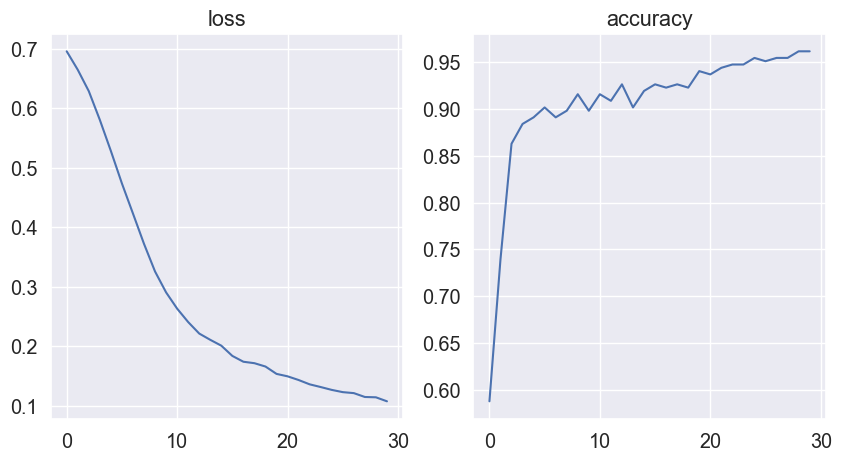

In [33]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(tf_model_worst.history["loss"])
plt.title("loss")
plt.subplot(1, 2, 2)
plt.plot(tf_model_worst.history["accuracy"])
plt.title("accuracy")